# TD1 - Echantillonage

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
#import torchaudio
#import torch
from IPython.display import Audio, display
from scipy.fft import fft
#from utils import *

1. Rappeler ce qu’est un spectre en amplitude ?

Le spectre d'amplitude est représentation des amplitudes Cn en fonction des fréquences fn= n*f0.


2. Que pouvez-vous dire sur les signaux dont les spectres en amplitude sont représentés ci-dessus ? (périodicité, contenu fréquentiel, etc?). Indiquer à quelles fréquences se situent les pics, que remarquez-vous ?


On voit qu'il n'y a pas de périodicité. Dans le cas de la voyelle /a/, le pic se situe à 200Hz et d'une amplitude ua de 8,5 et un second pic à 1000Hz de 5ua.
Dans le cas de la voyelle /i/,  le pic se situe à 200Hz et d'une amplitude ua de 8,5. la préiode est de 1/4000.

On cherche à présent à reproduire ces signaux. Nous allons fixer la fr ́equence d’ ́echantillonnage `a Fs = 8000 Hz (fr ́equence classique pour le traitement automatique de la parole). Le signal audio que nous allons produire aura une dur ́ee de 1.2 secondes : 0.1 secondes de silence, suivi de 0.5 pour la voyelle u, puis 0.5 secondes pour la voyelle euh et enfin 0.1 secondes de silence. Vous aurez au final deux signaux de 1.2 secondes correspondant aux 2 voyelles, que vous multiplierez par des portes situ ́ees aux bons instants.

3. Définir un signal sinusoïdal de fréquence f0 sur 1.2 secondes et le représenter sur 3 périodes. Pour cela vous aurez besoin de définir un vecteur de temps, et une fonction qui retourne les valeurs de la sinusoïde pour chaque instant. Vous définirez également une fonction rectangle de fenêtre a (en secondes), centrée sur le temps m (en secondes aussi), par défaut cette fonction sera centrée sur le milieu des temps. Tracer ces deux fonctions.

In [42]:
Fs = 8000  # Hz
Tm = 1.2   # secondes

t = np.linspace(0, Tm, int(Tm*Fs))


def sinusoide(tps, f0):
    # tps: vecteurs de temps correspondant à l'échantillonnage
    # f0 : fréquence fondamentale, inverse de la période fondamentale
    return np.sin(2*np.pi*f0*tps)


def rectangle(tps, a, fs, m = None):
    # tps: vecteurs de temps correspondant à l'échantillonnage
    # a : largeur de la fenêtre (en secondes) où le rectangle vaut 1.
    # attention ici on placera par défaut le temps t=0 au milieu
    n = len(tps)
    if m:
        n1 = int(m*fs) - int(a*fs/2)
        n2 = int(m*fs) + int(a*fs/2)
    else:
        n1 = n//2 - int(a*fs/2)
        n2 = n//2 + int(a*fs/2)
    rec = np.zeros(n)
    rec[n1:n2] = 1
    return rec

In [53]:
# Exemple d'utilisation :
f0 = 195
y = sinusoide(t,f0)


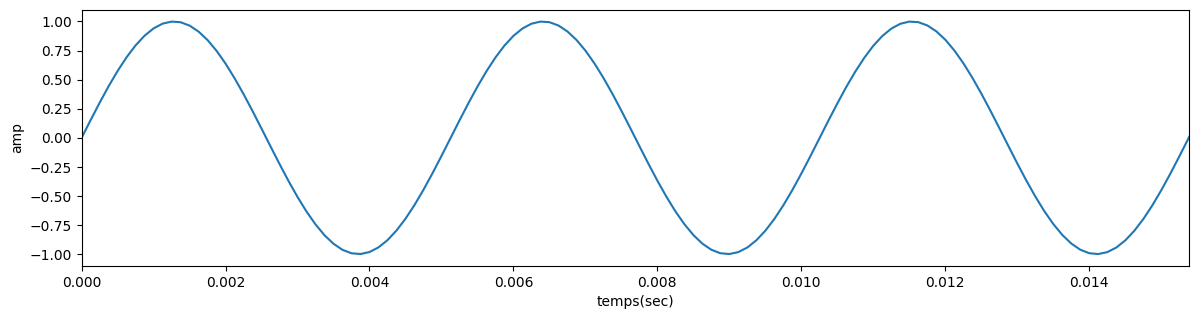

In [54]:
# Afficher le signal
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(t,y)
plt.xlabel('temps(sec)')
plt.xlim(0,3*(1/f0))
plt.ylabel('amp')
plt.tight_layout()
plt.show()